# M3: Advanced Matplotlib Graphing Assignment

Find some aspect of the data in this file that could provide insight to viewers if that aspect were
effectively highlighted in a presentation. The insight may pertain to some aspect of the data
observed in your time series decomposition work on that data, or you may consider the data in
its entirety. 

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [118]:
df = pd.read_csv('ConstructionTimeSeriesDataV2.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') #Data wrangling to clean column headers
df['date'] = pd.Series(pd.date_range(start='2002-01-01', periods=146, freq='MS'))  # create a time series column
df['month-year'] = df['date']
df.columns
df.head()

,month,month-year,total_construction,private_construction,public_construction,date
0,1,2002-01-01,59516,45273,14243,2002-01-01
1,2,2002-02-01,58588,44475,14113,2002-02-01
2,3,2002-03-01,63782,49396,14386,2002-03-01
3,4,2002-04-01,69504,53283,16221,2002-04-01
4,5,2002-05-01,73384,55009,18375,2002-05-01


Text(0.5, 0.98, 'Spending on Construction: Private and Public')

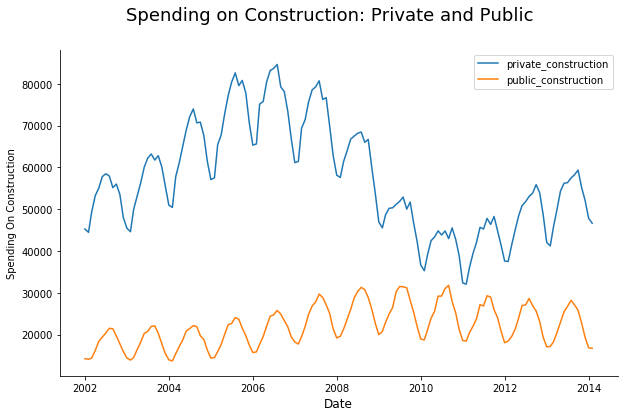

In [119]:
fig,ax = plt.subplots()
plt.plot(df.date, df.private_construction)
plt.plot(df.date, df.public_construction)
#plt.plot(df.date, df.total_construction)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Date',fontsize='12')
ax.set_ylabel('Spending On Construction')
ax.legend()

fig.set_size_inches(10,6)
fig.suptitle("Spending on Construction: Private and Public",fontsize='18')

#ax.axvspan(2008,2009,ymin=0,ymax = 300,facecolor='k',alpha=0.1)
#ax.text(100,85,'Atypical\nStability',fontsize=14,verticalalignment='center',horizontalalignment='center')

## First, I will decompose the Private Construction time series.

In [120]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df.index,df['private_construction'])
print('Private Construction\nintercept =', intercept, '    slope =', slope, '     p_value = ',p_value)
#slope, intercept, r_value, p_value, std_err = stats.linregress(df.index,df['public_construction'])
#print('\nPublic Construction\nintercept =', intercept, '    slope =', slope, '     p_value = ',p_value)

Private Construction
intercept = 66985.60357841766     slope = -132.5985944684912      p_value =  3.965217656244861e-08


In [121]:
def create_regress_col(row, intercept, slope):
    return float(intercept) + float(row['month']) * slope
    
df['regress_private'] = df.apply(create_regress_col,args = (intercept,slope),axis = "columns")
df['R1_private'] = df['private_construction'] - df['regress_private']
df.style.format({
    'private_construction': '{:,.0f}'.format,
    'regress_private': '{:,.0f}'.format,
    'R1_private': '{:,.0f}'.format
})

,month,month-year,total_construction,private_construction,public_construction,date,regress_private,R1_private
0,1,2002-01-01 00:00:00,59516,"45,273",14243,2002-01-01 00:00:00,"66,853","-21,580"
1,2,2002-02-01 00:00:00,58588,"44,475",14113,2002-02-01 00:00:00,"66,720","-22,245"
2,3,2002-03-01 00:00:00,63782,"49,396",14386,2002-03-01 00:00:00,"66,588","-17,192"
3,4,2002-04-01 00:00:00,69504,"53,283",16221,2002-04-01 00:00:00,"66,455","-13,172"
4,5,2002-05-01 00:00:00,73384,"55,009",18375,2002-05-01 00:00:00,"66,323","-11,314"
5,6,2002-06-01 00:00:00,77182,"57,801",19381,2002-06-01 00:00:00,"66,190","-8,389"
6,7,2002-07-01 00:00:00,78863,"58,494",20369,2002-07-01 00:00:00,"66,057","-7,563"
7,8,2002-08-01 00:00:00,79460,"57,953",21507,2002-08-01 00:00:00,"65,925","-7,972"
8,9,2002-09-01 00:00:00,76542,"55,157",21385,2002-09-01 00:00:00,"65,792","-10,635"
9,10,2002-10-01 00:00:00,75710,"56,023",19687,2002-10-01 00:00:00,"65,660","-9,637"


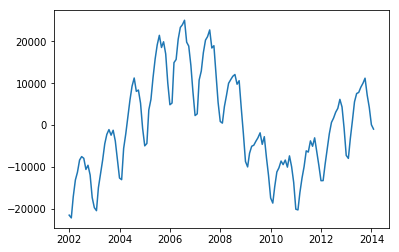

In [122]:
#Plot Residuals after first regressoion.
fig,ax = plt.subplots()
plt.plot(df.date, df.R1_private)

   month month-year  total_construction  private_construction  \
0      1 2002-01-01               59516                 45273   
1      2 2002-02-01               58588                 44475   
2      3 2002-03-01               63782                 49396   
3      4 2002-04-01               69504                 53283   
4      5 2002-05-01               73384                 55009   
5      6 2002-06-01               77182                 57801   
6      7 2002-07-01               78863                 58494   
7      8 2002-08-01               79460                 57953   
8      9 2002-09-01               76542                 55157   
9     10 2002-10-01               75710                 56023   

   public_construction       date  regress_private    R1_private  lag12  
0                14243 2002-01-01     66853.004984 -21580.004984    NaN  
1                14113 2002-02-01     66720.406389 -22245.406389    NaN  
2                14386 2002-03-01     66587.807795 -17191.8077

Text(0.5, 0, 'Month')

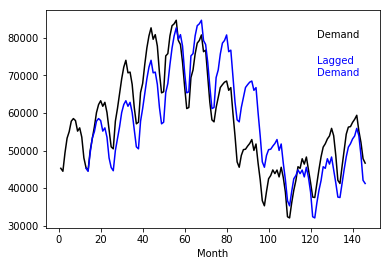

In [123]:
# Create column with lag of 4
lag = 12
df['lag12'] = np.NaN
for i in range(len(df['lag12']))[lag:]:
    df['lag12'].iloc[i] = df['private_construction'].iloc[i-12]
print(df.head(n=10))

# Compute autocorrelations
for i in range(int(len(df.month)/2)):
    print('autocorrelation, lag =',i,':',df.R1_private.autocorr(lag = i))
    
    ## Autocorrelation of lag12 is highest and represents 12 month cycles.
    
fig,ax = plt.subplots()
ax.plot(df.month,df.private_construction,c='k')
ax.plot(df.month,df.lag12,c='b')
#ax.set_xlim([1,19])
ax.text(123,80000,'Demand',color='k')
ax.text(123,70000,'Lagged\nDemand',color='b')
ax.set_xlabel('Month')

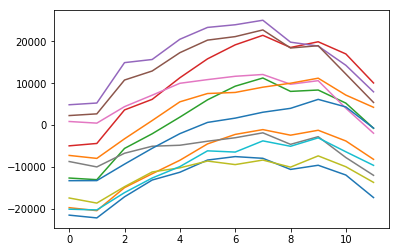

In [95]:
dfMonth = pd.DataFrame()
cycleLen = 12
for i in range(int(len(df.month)/cycleLen)):
    newData = pd.DataFrame({i:df['R1_private'].iloc[i*cycleLen:(i+1)*cycleLen]})
    newData.index = range(0,len(newData))
    dfMonth = pd.concat([dfMonth,newData],axis=1)

fig,ax = plt.subplots()
ax.plot(dfMonth)

               0             1             2             3             4  \
0  -21580.004984 -19788.821850 -12695.638717  -4985.455583   4850.727551   
1  -22245.406389 -20509.223256 -13089.040122  -4415.856989   5266.326145   
2  -17191.807795 -15000.624661  -5609.441528   3610.741606  14939.924739   
3  -13172.209201 -11669.026067  -2095.842933   6147.340200  15689.523334   
4  -11313.610606  -8445.427472   1886.755661  11312.938795  20530.121928   
5   -8389.012012  -4522.828878   6031.354256  15841.537389  23370.720523   
6   -7563.413417  -2250.230284   9294.952850  19196.135984  24007.319117   
7   -7971.814823  -1099.631689  11258.551445  21477.734578  25088.917712   
8  -10635.216228  -2434.033095   8052.150039  18565.333173  19840.516306   
9   -9636.617634  -1255.434500   8378.748634  19933.931767  18904.114901   
10 -11975.019039  -3820.835906   5240.347228  17020.530362  14298.713495   
11 -17371.420445  -8219.237311   -774.054178  10071.128956   7942.312090   

           

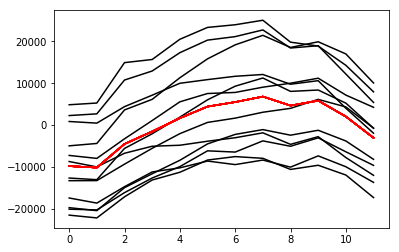

In [124]:
avg = []
for i in range(len(dfMonth.index)):
    avg.append(dfMonth.iloc[i].mean())

dfMonth = pd.concat([dfMonth,pd.DataFrame({'avg':avg})], axis=1)
print(dfMonth)

fig,ax = plt.subplots()
#c = 180
for col in dfMonth.columns.values:
    if col == 'avg':
        ax.plot(dfMonth[col], c = 'r')
    else:
        ax.plot(dfMonth[col], c = 'k')

In [126]:
df['S'] = np.NaN
df['R2'] = np.NaN
df['Composite'] = np.NaN
df['errorPerc'] = np.NaN
S = dfMonth['avg'].tolist()
for i in df.month:
    df.loc[i,'S'] = S[i%cycleLen]
    df.loc[i,'R2'] = df.loc[i,'R1_private'] - df.loc[i,'S']
    df.loc[i,'Composite'] = df.loc[i,'regress_private'] + df.loc[i,'S']
    df.loc[i,'errorPerc'] = 100*df.loc[i,'R2'] / df.loc[i,'private_construction']
df.style.format({
    'private_construction': '{:,.0f}'.format,
    'regress_private': '{:,.0f}'.format,
    'R1_private': '{:,.0f}'.format,
    'S': '{:,.0f}'.format,
    'R2': '{:,.0f}'.format,
    'Composite':'{:,.0f}'.format,
    'errorPerc': '{:.2f}%'.format
})

AttributeError: 'DataFrame' object has no attribute 'tolist'

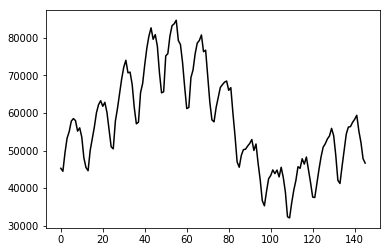

In [127]:
fig, ax = plt.subplots()
ax.plot(df['private_construction'],c='k')
ax.plot(df['Composite'],c='b')

I was doing so well! I don't know what went wrong here!!!